#### In this notebook we retrieve 1000 tweets from # 100DaysOfCode and we save them in a CSV file.

#### Before this notebook can be used, a Twitter developer account must be available. So the following first:
- Create a Twitter developer account
- Create a new Twitter app
- Save Twitter API OAuth Authentication details

In [17]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = '1255066515642212352-zedeN3c8om5Vqy296w0QuGYPlVrmEt'
ACCESS_SECRET = 'IMvBlkwWFXADval5ICFwelM19gb99bMP3z0FR5xiPKTek'
CONSUMER_KEY = '0OSN2zpL9RSsyIQoaMW46Wboz'
CONSUMER_SECRET = 'r5Gn8rzgGVyYnricEQjwt2jrRnovmoIMtu1NEAThmWPbQOkgUP'

# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    #api = tweepy.API(auth,wait_on_rate_limit=True)
    api = tweepy.API(auth)
    return api

In [6]:
# Create API object
api = connect_to_twitter_OAuth()

In [7]:
# tweets from my stream
public_tweets = api.home_timeline()
for tweet in public_tweets:
    #print(type(tweet))
    print(tweet.text)

BebopNet: Neural Models for Jazz Improvisations https://t.co/3UenReRDEu
If you work in data, sooner or later you're going to be asked to build a dashboard. These are some good mistakes to… https://t.co/ziyRknPMU5
Distributed training in tf.keras with W&amp;B  https://t.co/4brWhPnBdn
This is a cool #learnpython tutorial:

https://t.co/MrIAsIsLin
Dashboards are not dead  https://t.co/VbyNSEUJQ6
A Guide to Object Oriented Programming with Python https://t.co/djzpHFHp2P
Six essential plots for time series data analysis https://t.co/T5CGrdKprA
You Need ModelOps To Scale by @junwuwriting  https://t.co/KgKJ10V72D
Email Analytics: More than you ever need to know by @Randy_Au https://t.co/VxdkEw8Fny
Tomorrow at 11 AM ET: Join our own @richierocks and @Raltsimmons of @AXA_XL to learn how you can implement and meas… https://t.co/yxs7FMdrsR
Eddie went from having zero experience with programming to a job as a full-time data engineer in less than six mont… https://t.co/eWNLYBFZeZ
Difference between

In [8]:
# how does json look like?
print(json.dumps(api.home_timeline()[0]._json,indent=4))

{
    "created_at": "Wed Apr 29 22:49:00 +0000 2020",
    "id": 1255630191830892546,
    "id_str": "1255630191830892546",
    "text": "BebopNet: Neural Models for Jazz Improvisations https://t.co/3UenReRDEu",
    "truncated": false,
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [
            {
                "url": "https://t.co/3UenReRDEu",
                "expanded_url": "https://buff.ly/2KN90WZ",
                "display_url": "buff.ly/2KN90WZ",
                "indices": [
                    48,
                    71
                ]
            }
        ]
    },
    "source": "<a href=\"https://buffer.com\" rel=\"nofollow\">Buffer</a>",
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "in_reply_to_screen_name": null,
    "user": {
        "id": 788898706586275840,
        "id_str": "788898706586275840",
        "nam

In [9]:
#search API
query = "#100DaysOfCode -filter:retweets"
max_tweets = 1000
df = pd.DataFrame(
    [tweet.id, tweet.user.id, tweet.user.screen_name, tweet.user.followers_count, tweet.retweet_count, tweet.favorite_count, tweet.text.encode('utf-8'), tweet.created_at, tweet.user.location, tweet.source, tweet.lang] for tweet in tweepy.Cursor(api.search, q=query, result_type='recent').items(max_tweets)
)

In [10]:
#add column names
df.columns=['tweet_id', 
            'id', 
            'screen_name', 
            'retweet_count',
            'followers_count',
            'favourite_count', 
            'text', 
            'created_at', 
            'location', 
            'source_device', 
            'language']

In [11]:
df

,tweet_id,id,screen_name,retweet_count,followers_count,favourite_count,text,created_at,location,source_device,language
0,1255638057157607424,11871142,_DiegoMoura,124,1,0,b'After working on this project for a few days...,2020-04-29 23:20:16,"Toronto, Ontario",Twitter for iPhone,en
1,1255637989436293120,948880157812588544,TabithaKavyu,2180,2,1,b'Day 61 of #100DaysofCode\nMe : Will I ever f...,2020-04-29 23:19:59,"Nairobi, Kenya",Twitter for Android,en
2,1255637815519440896,1189305998437011456,harukarist,622,1,0,b'Day148 4/29\n\xe3\x82\xa6\xe3\x82\xa7\xe3\x...,2020-04-29 23:19:18,,Twitter for iPhone,ja
3,1255637677845733376,1220652064776343552,EngrGerald1,24,2,0,"b""Listening to good music after long hours of ...",2020-04-29 23:18:45,Nigeria,Twitter for Android,en
4,1255637652864331777,1162159254867853313,crowchirp,24,0,0,b'I usually spend 2 hours a day sampling my #1...,2020-04-29 23:18:39,Internet,Twitter Web App,en
...,...,...,...,...,...,...,...,...,...,...,...
995,1255531264972636160,1223117766368079872,thulani_ncube_,12,8,9,"b""Hello fellow coders, here's a python #CodeNe...",2020-04-29 16:15:54,"Johannesburg, South Africa",Twitter for Android,en
996,1255531235763523584,1091126245033738247,alyd789,143,5,3,b'{09-10/100} #100DaysOfCode \n\nOn day 9 cont...,2020-04-29 16:15:47,,Twitter for iPhone,en
997,1255531098337087491,3005807094,Ansem__,158,10,2,b'Day 39(yesterday)\nLearned more about the DO...,2020-04-29 16:15:15,earth,Twitter for iPhone,en
998,1255530942296285185,1077617530418606080,dev_sandesh92,401,3,7,b'Completed Day40 of #100daysofSwiftUI. Few n...,2020-04-29 16:14:37,Goa,Twitter Web App,en


In [12]:
df.describe()

,tweet_id,id,retweet_count,followers_count,favourite_count
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,1.255583e+18,6.889564e+17,1445.731000,3.988000,4.492000
std,3.026960e+13,5.436532e+17,8759.764081,4.970771,10.847747
min,1.255531e+18,1.402300e+04,0.000000,0.000000,0.000000
25%,1.255558e+18,1.963464e+09,43.000000,2.000000,1.000000
50%,1.255582e+18,9.510423e+17,144.000000,3.000000,2.000000
75%,1.255609e+18,1.189206e+18,568.000000,5.000000,4.000000
max,1.255638e+18,1.255583e+18,148180.000000,97.000000,183.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tweet_id         1000 non-null   int64         
 1   id               1000 non-null   int64         
 2   screen_name      1000 non-null   object        
 3   retweet_count    1000 non-null   int64         
 4   followers_count  1000 non-null   int64         
 5   favourite_count  1000 non-null   int64         
 6   text             1000 non-null   object        
 7   created_at       1000 non-null   datetime64[ns]
 8   location         1000 non-null   object        
 9   source_device    1000 non-null   object        
 10  language         1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 86.1+ KB


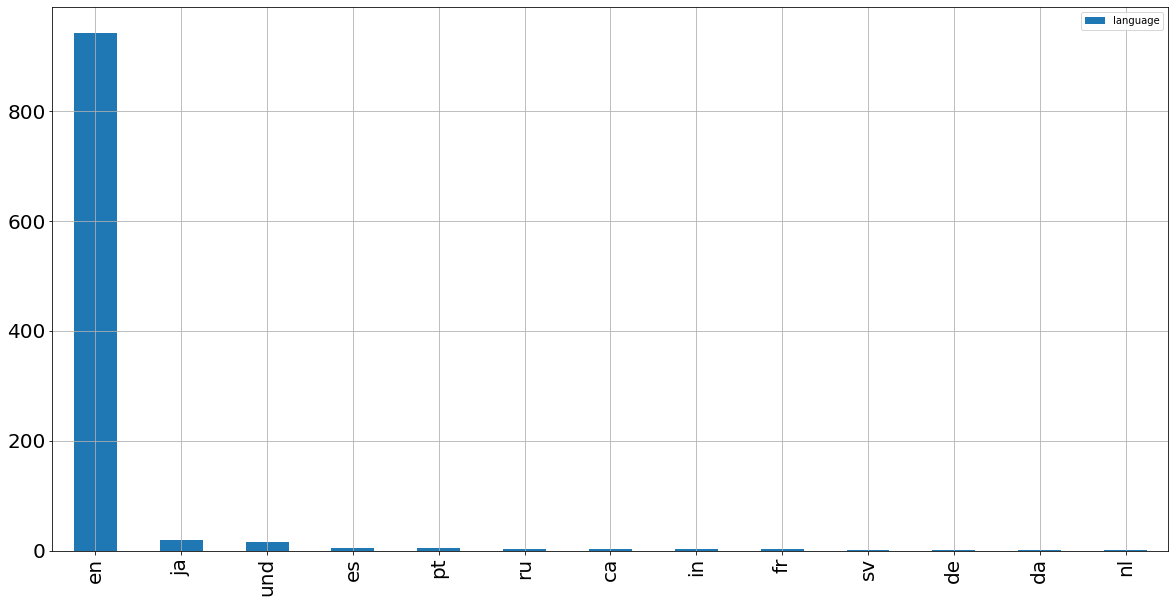

In [24]:
df_l = pd.DataFrame(df['language'].value_counts())
df_l.plot.bar(figsize=(20,10), grid=True, fontsize=20)

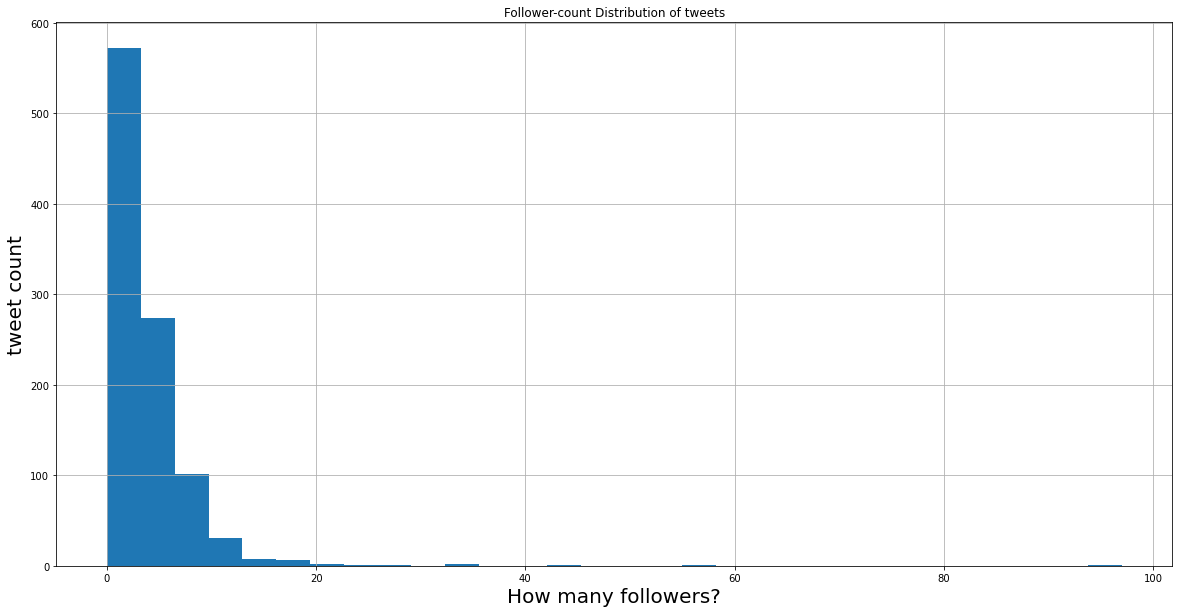

<Figure size 432x288 with 0 Axes>

In [26]:
#Follower numbers 
plt.figure(figsize=(20,10))
plt.hist(df['followers_count'],bins=30)
plt.xlabel('How many followers?',fontsize=20)
plt.ylabel('tweet count',fontsize=20)
plt.title('Follower-count Distribution of tweets',fontsize=30)
plt.grid(True)
plt.show()
plt.clf()

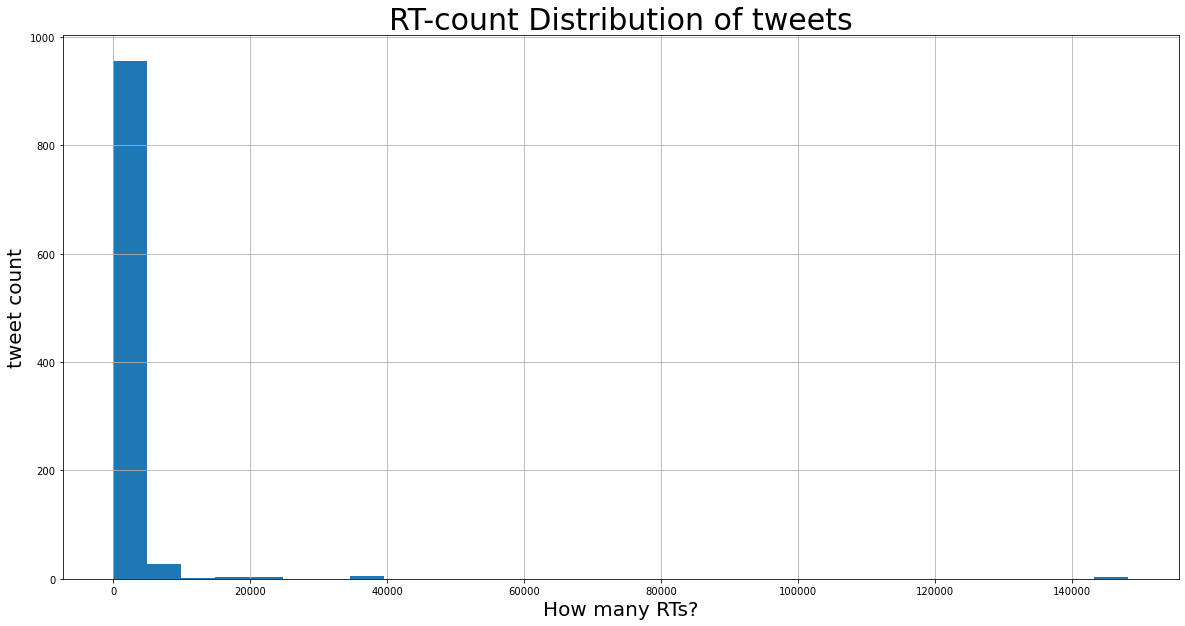

<Figure size 432x288 with 0 Axes>

In [27]:
#RT counts 
plt.figure(figsize=(20,10))
plt.hist(df['retweet_count'],bins=30)
plt.xlabel('How many RTs?',fontsize=20)
plt.ylabel('tweet count',fontsize=20)
plt.title('RT-count Distribution of tweets',fontsize=30)
plt.grid(True)
plt.show()
plt.clf()

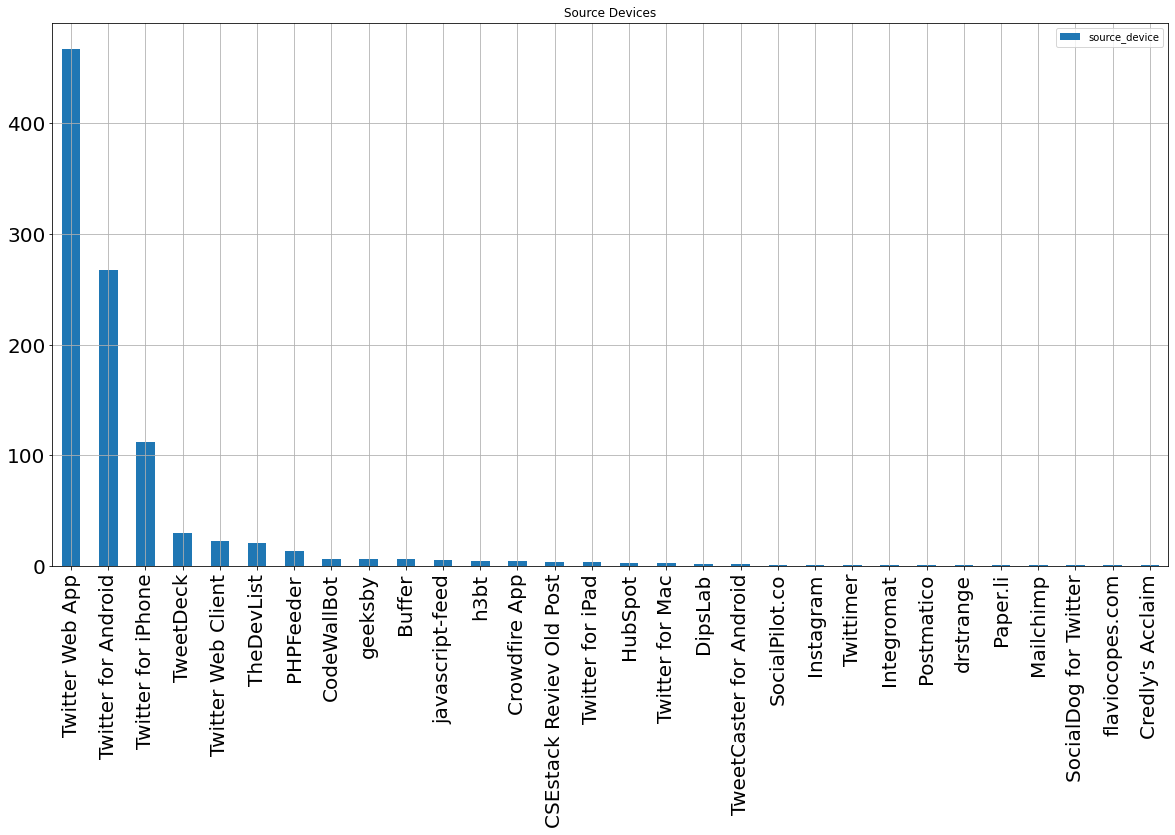

In [32]:
df_s = pd.DataFrame(df['source_device'].value_counts())
df_s.plot.bar(figsize=(20,10), grid=True, fontsize=20, title='Source Devices')

In [67]:
pd.DataFrame(df['location'].value_counts()).to_csv('locations.csv')
pd.DataFrame(df['location'].value_counts().head(30))

,location
,296
India,20
"Lagos, Nigeria",19
"Nairobi, Kenya",16
Las Vegas,13
"Bengaluru, India",10
"London, England",9
London,9
"San Francisco, CA",8
Nigeria,8


In [55]:
df_id = pd.DataFrame(df['id'].value_counts())
df_id['ix'] = df_id.index
df_id.rename(columns={'ix': 'account_id', 'id': 'tweet_count'}, inplace=True)
df_id

,tweet_count,account_id
1233757919277133837,21,1233757919277133837
1233758868108447746,14,1233758868108447746
1323552834,13,1323552834
582110422,12,582110422
1013701124702928896,7,1013701124702928896
...,...,...
1073785726226059269,1,1073785726226059269
805751111915290624,1,805751111915290624
1056140672346939392,1,1056140672346939392
223835431,1,223835431


In [66]:
#how many tweets per account?
df_ids = pd.merge(df_id, df[['id','screen_name']], left_on='account_id', right_on='id')
df_twc = df_ids.set_index('screen_name').drop_duplicates().iloc[:,:2]
df_twc.to_csv('twc_per_user.csv')
df_twc

,tweet_count,account_id
screen_name,,
The_DevList,21,1233757919277133837
ThePHPFeed,14,1233758868108447746
Udemy_Coupons1,13,1323552834
wayne_gakuo,12,582110422
Geeksby,7,1013701124702928896
...,...,...
juantobiasdl7,1,1073785726226059269
Vasantha_KumarJ,1,805751111915290624
dlearningland,1,1056140672346939392
